Testing explicit solver propagation against the exact Fourier derivative/time exponential propagation and Fourier propagation (rotation matrix.)

In [1]:
import os.path
from scipy import *
import numpy as np
from numpy import *
from numpy import linalg as LA
from scipy import linalg as LA2
import sympy as sympy
import sys as sys
import time
import matplotlib.pyplot as plt
import itertools as it
from IPython.core.display import HTML

from Modules import BasicTools as BT
from Modules import WaveTools as WT
from Modules import PlotTools as PT
from Modules import FFTTools as FFTT
from Modules import OperatorTools as OT
from Modules import GridTransferTools as GTT
from Modules import TestTools as TT
from Modules import SolverTools as ST

display(HTML("<style>pre { white-space: pre !important; }</style>"))
np.set_printoptions( linewidth = 10000, threshold = 100000)

In [2]:
nh = 32
refRatio = 2
c = 1.
CFL = 0.5
nt = 50
RK = 4
deriv = 'CD'
order = 1

In [3]:
if (RK == 1):
    TimeIntegratorFunc = ST.ForwardEuler
else:
    if (RK == 2):
        TimeIntegratorFunc = ST.MidpointMeth
    else:
        TimeIntegratorFunc = ST.RK4

if (deriv == 'U'):
    # DiffMatFunc = OT.Upwind1D
    DiffFunc = TT.Upwind#ST.Upwind
else:
    # DiffMatFunc = OT.CenterDiff1D
    DiffFunc = TT.CenterDiff#ST.CenterDiff

In [4]:
omega = BT.Grid(nh)
finehalf = list(np.arange(int(nh / refRatio)) + int(nh / refRatio))
omega.AddPatch(refRatio, finehalf)
degFreed = omega.degFreed
nh_min = omega.nh_min
nh_max = omega.nh_max
t, nt = ST.CalcTime(omega, CFL, c, nt = nt)
derivMat = OT.SpaceDeriv(omega, order, deriv)
spatOp = -c * derivMat
strings = omega.strings
timePropOp = LA2.expm(t * spatOp)
waves = WT.MakeWaves(omega)
omegaF = BT.Grid(nh_max)
wavesF = WT.MakeWaves(omegaF)
# print(strings)

In [5]:
print('derivMat =\n', derivMat, '\n')
print('spatOp =\n', spatOp, '\n')
print('timePropOp =\n', timePropOp, '\n')

derivMat =
 [[  0.          16.           0.           0.           0.           0.           0.           0.           0.           0.           0.           0.           0.           0.           0.           0.           0.           0.           0.           0.           0.           0.           0.           0.           0.           0.           0.           0.           0.           0.           0.           0.           0.           0.           0.           0.           0.           0.           0.           0.           0.           0.           0.           0.           0.           0.          -8.          -8.        ]
 [-16.           0.          16.           0.           0.           0.           0.           0.           0.           0.           0.           0.           0.           0.           0.           0.           0.           0.           0.           0.           0.           0.           0.           0.           0.           0.           0.           0.    

In [6]:
restrictOp = GTT.CoarsenOp(omega)

nullspace = OT.FindNullspace(omega, waves)

x = np.linspace(0, 1, num = nh_max + 1)[:-1] + (1. / (2. * nh_max))
sqStart = int(nh_max / 8)
sqEnd = int((2 * nh_max) / 8)
print(sqStart, sqEnd)

8 16


In [7]:
#     # waveform = np.zeros(nh_max, float)
#     # waveform[sqStart:sqEnd] = 1
#     # waveform = x - 0.5

#     # FCoefs = nullspace[:, ::-1][:, 0]
#     # waveform = wavesF @ FCoefs
# cMat = c * np.eye(degFreed)
# FCoefsF = np.zeros(nh_max, float).transpose()
# FCoefsF[1] = 1
# # FCoefs = np.zeros((nh_max, nh_max), float)[:, :nh_min]
# # PropFCoefs = np.zeros((nh_max, nh_max), float)[:, :nh_min]
# # solverCoefs = np.zeros((nh_max, nh_max), float)[:, :nh_min]
# # exTimeCoefs = np.zeros((nh_max, nh_max), float)[:, :nh_min]
# # labels = [[] for k in range(nh_min)]
# xProp = r'$(x - c t)$'

# waveformF = wavesF @ FCoefsF

# # FCoefs = FFTT.FourierCoefs(omega, waves @ nullspace, waveform)
# # # # FCoefs[1::2] = 0
# # waveform = waves @ nullspace @ FCoefs
# propFCoefs = FFTT.PropRestrictWaves(omega, waveformF, c, t)
# waveform = restrictOp @ waveformF
# FCoefs = FFTT.FourierCoefs(omega, waves @ nullspace, waveform)

# solverCoefs = TimeIntegratorFunc(omega, waves @ nullspace, waveform, nt, cMat, CFL, DiffFunc)
# exTimeForm = timePropOp @ waveform
# exTimeCoefs = FFTT.FourierCoefs(omega, waves @ nullspace, exTimeForm)


# # propFCoefs = FFTT.PropogateFCoefs(omega, FCoefs, c, t)
# labels = [r'$u_{0} (x)$', r'Exact $u_{0} (x - c t)$', r'Exact Time $u_{0} (x - c t)$', r'Time Integrator $u_{0} (x - c t)$']
# allCoefs = PT.Load(FCoefs, propFCoefs, exTimeCoefs, solverCoefs)


In [8]:
restrictOp = GTT.CoarsenOp(omega)

nullspace = OT.FindNullspace(omega, waves)
cMat = c * np.eye(degFreed)
x = np.linspace(0, 1, num = nh_max + 1)[:-1] + (1. / (2. * nh_max))
sqStart = int(nh_max / 8)
sqEnd = int((2 * nh_max) / 8)
print(sqStart, sqEnd)
waveform = np.zeros(nh_max, float)
waveform[sqStart:sqEnd] = 1
# waveform = 0.5 * x**2 - (0.5 * x) #x - 0.5
# FCoefs = nullspace[:, ::-1][:, 0]
FCoefs = np.zeros(nh_max, float)
FCoefs[1] = 1
waveform = wavesF @ FCoefs


print(x)
print(waveform)

# FCoefs = FFTT.FourierCoefs(omega, waves @ nullspace, waveform)
# # # FCoefs[1::2] = 0
# waveform = waves @ nullspace @ FCoefs
propFCoefs = FFTT.PropRestrictWaves(omega, waveform, c * t)
waveform = restrictOp @ waveform
FCoefs = FFTT.FourierCoefs(omega, waves @ nullspace, waveform)

solverCoefs = TimeIntegratorFunc(omega, waves @ nullspace, waveform, nt, cMat, CFL, DiffFunc)
exTimeForm = timePropOp @ waveform
exTimeCoefs = FFTT.FourierCoefs(omega, waves @ nullspace, exTimeForm)
solverCoefs2 = TimeIntegratorFunc(omega, waves @ nullspace, waveform, nt, cMat, CFL, TT.Upwind)


# propFCoefs = FFTT.PropogateFCoefs(omega, FCoefs, c, t)
labels = [r'$u_{0} (x)$', r'Exact $u_{0} (x - c t)$', r'Exact Time $u_{0} (x - c t)$', r'Time Integrator $u_{0} (x - c t)$']
allCoefs = PT.Load(FCoefs, propFCoefs, exTimeCoefs, solverCoefs)


8 16
[0.0078125 0.0234375 0.0390625 0.0546875 0.0703125 0.0859375 0.1015625 0.1171875 0.1328125 0.1484375 0.1640625 0.1796875 0.1953125 0.2109375 0.2265625 0.2421875 0.2578125 0.2734375 0.2890625 0.3046875 0.3203125 0.3359375 0.3515625 0.3671875 0.3828125 0.3984375 0.4140625 0.4296875 0.4453125 0.4609375 0.4765625 0.4921875 0.5078125 0.5234375 0.5390625 0.5546875 0.5703125 0.5859375 0.6015625 0.6171875 0.6328125 0.6484375 0.6640625 0.6796875 0.6953125 0.7109375 0.7265625 0.7421875 0.7578125 0.7734375 0.7890625 0.8046875 0.8203125 0.8359375 0.8515625 0.8671875 0.8828125 0.8984375 0.9140625 0.9296875 0.9453125 0.9609375 0.9765625 0.9921875]
[ 0.04904797  0.14667156  0.24288261  0.33675458  0.42738341  0.51389631  0.5954601   0.67128929  0.7406536   0.80288501  0.85738419  0.9036263   0.94116599  0.96964174  0.98877931  0.99839439  0.99839439  0.98877931  0.96964174  0.94116599  0.9036263   0.85738419  0.80288501  0.7406536   0.67128929  0.5954601   0.51389631  0.42738341  0.33675458  0.2

In [9]:
print(x)
print(waveform)
# print(derivMat)
print('')
print(derivMat @ waveform)
print('')

[0.0078125 0.0234375 0.0390625 0.0546875 0.0703125 0.0859375 0.1015625 0.1171875 0.1328125 0.1484375 0.1640625 0.1796875 0.1953125 0.2109375 0.2265625 0.2421875 0.2578125 0.2734375 0.2890625 0.3046875 0.3203125 0.3359375 0.3515625 0.3671875 0.3828125 0.3984375 0.4140625 0.4296875 0.4453125 0.4609375 0.4765625 0.4921875 0.5078125 0.5234375 0.5390625 0.5546875 0.5703125 0.5859375 0.6015625 0.6171875 0.6328125 0.6484375 0.6640625 0.6796875 0.6953125 0.7109375 0.7265625 0.7421875 0.7578125 0.7734375 0.7890625 0.8046875 0.8203125 0.8359375 0.8515625 0.8671875 0.8828125 0.8984375 0.9140625 0.9296875 0.9453125 0.9609375 0.9765625 0.9921875]
[ 0.09785976  0.28981859  0.47063986  0.6333747   0.7717693   0.88050525  0.95540387  0.99358685  0.99358685  0.95540387  0.88050525  0.7717693   0.6333747   0.47063986  0.28981859  0.09785976 -0.04904797 -0.14667156 -0.24288261 -0.33675458 -0.42738341 -0.51389631 -0.5954601  -0.67128929 -0.7406536  -0.80288501 -0.85738419 -0.9036263  -0.94116599 -0.969641

Are you *sure* your labels are ordered correctly?
This image has been saved under /Users/sashacurcic/SashasDirectory/ANAG/FV_MG/Figures/smoothsine1.


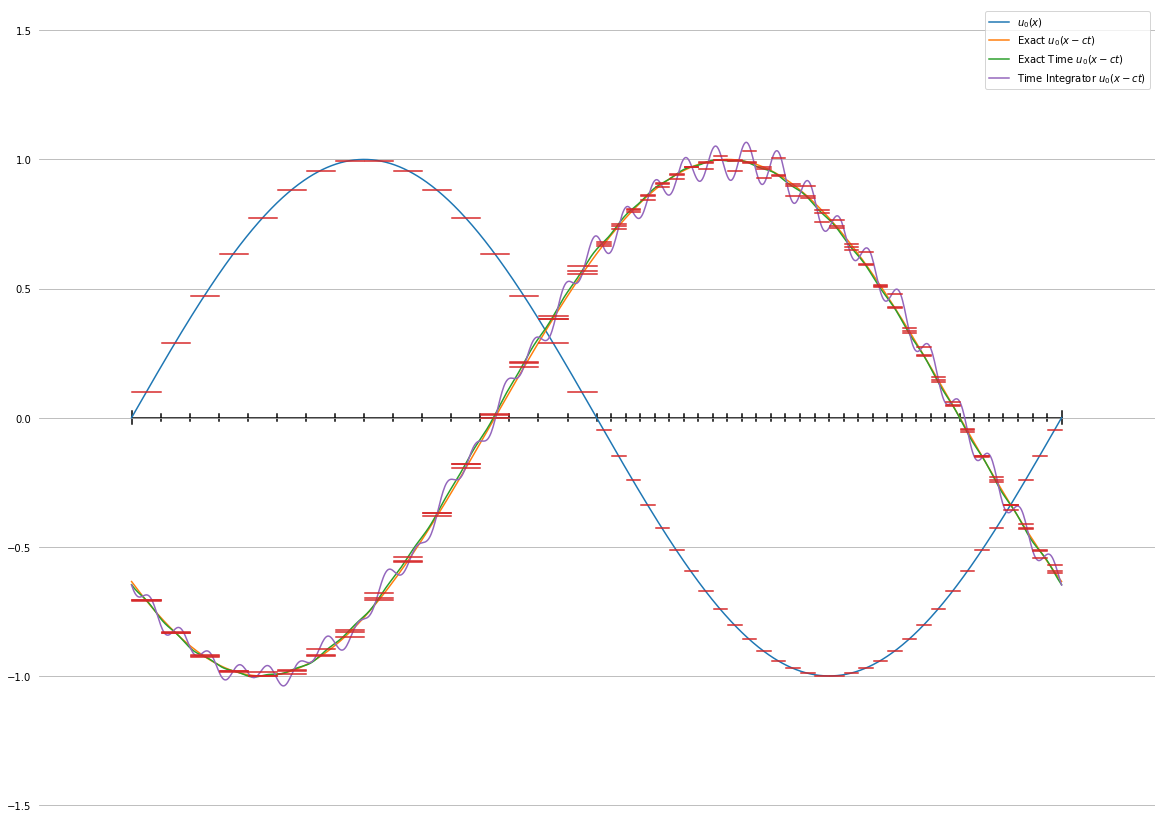

In [10]:
PT.PlotMixedWave(omega, waves, nullspace @ allCoefs, rescale = [4, 6], labels = labels, yGrid = True, dpi = 300, saveName = 'smoothsine1')


This image has been saved under /Users/sashacurcic/SashasDirectory/ANAG/FV_MG/Figures/initial.


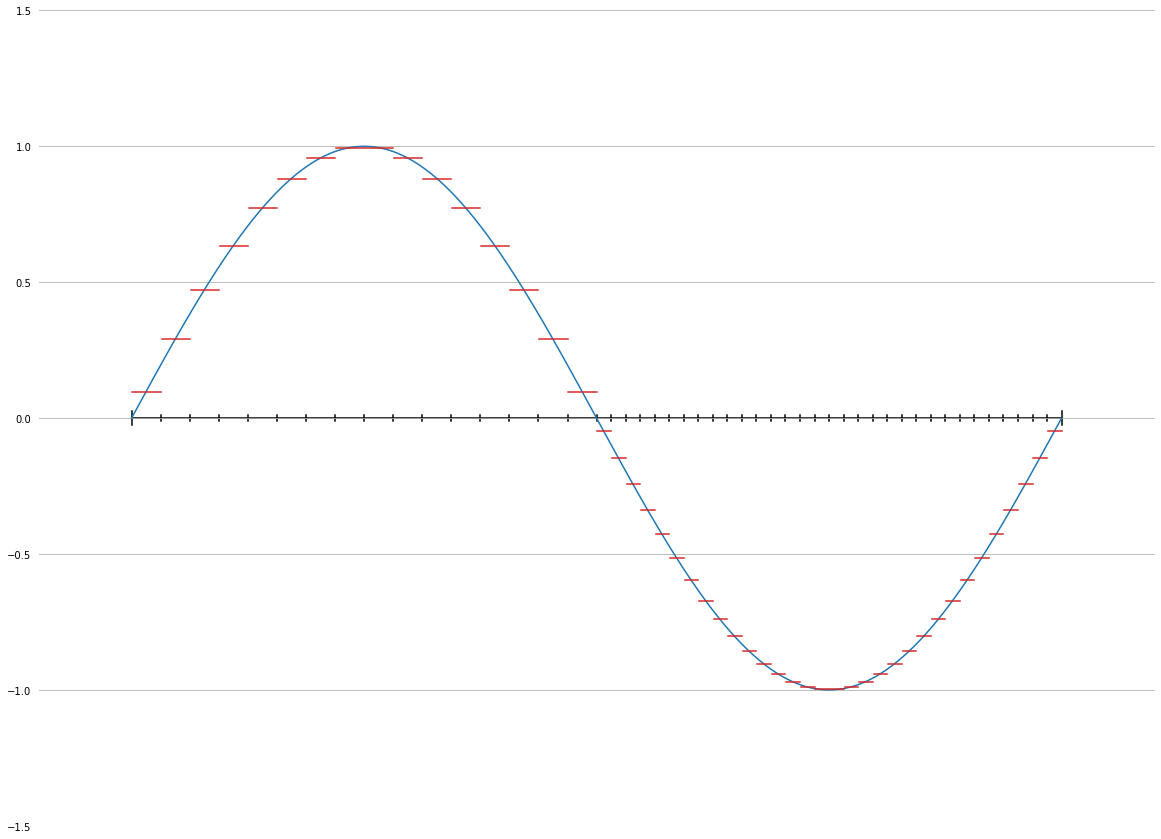

In [11]:
PT.PlotMixedWave(omega, waves, nullspace @ FCoefs, rescale = [4, 6], yGrid = True, dpi = 300, saveName = 'initial')


This image has been saved under /Users/sashacurcic/SashasDirectory/ANAG/FV_MG/Figures/final.


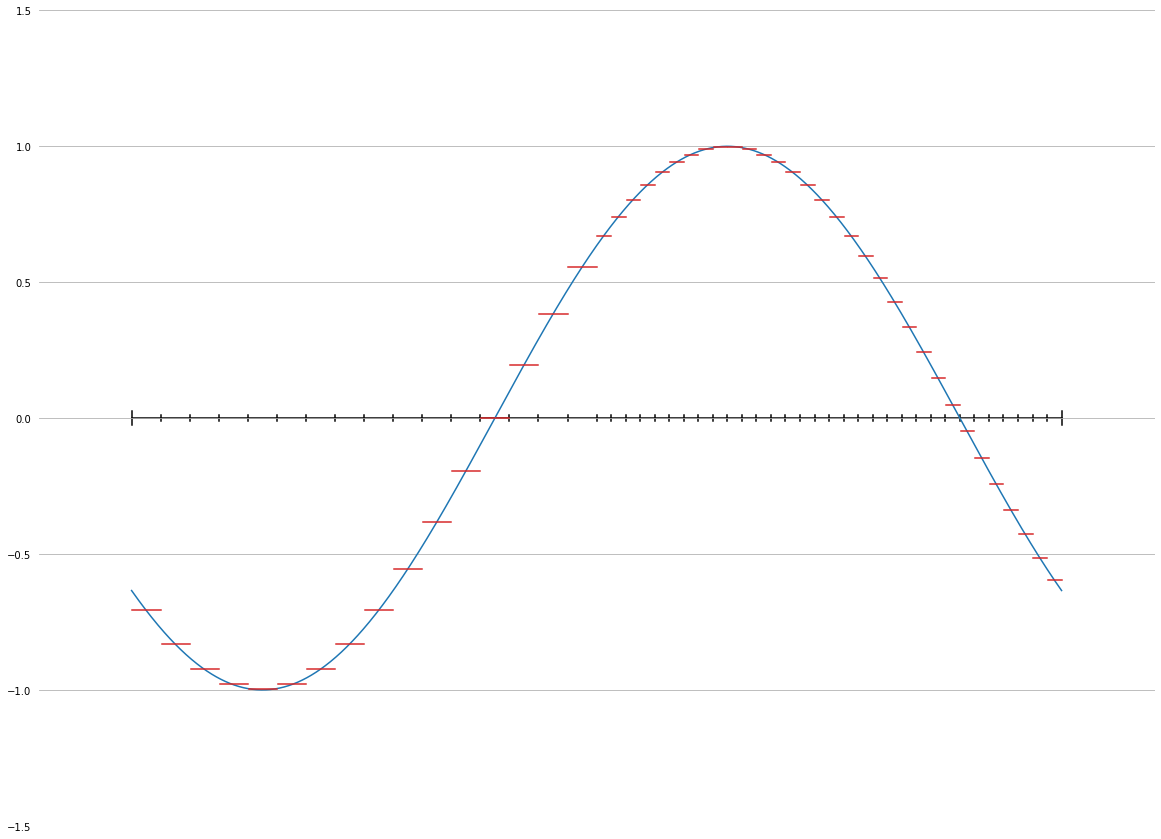

In [12]:
PT.PlotMixedWave(omega, waves, nullspace @ propFCoefs, rescale = [4, 6], yGrid = True, dpi = 300, saveName = 'final')


23
23
23
23


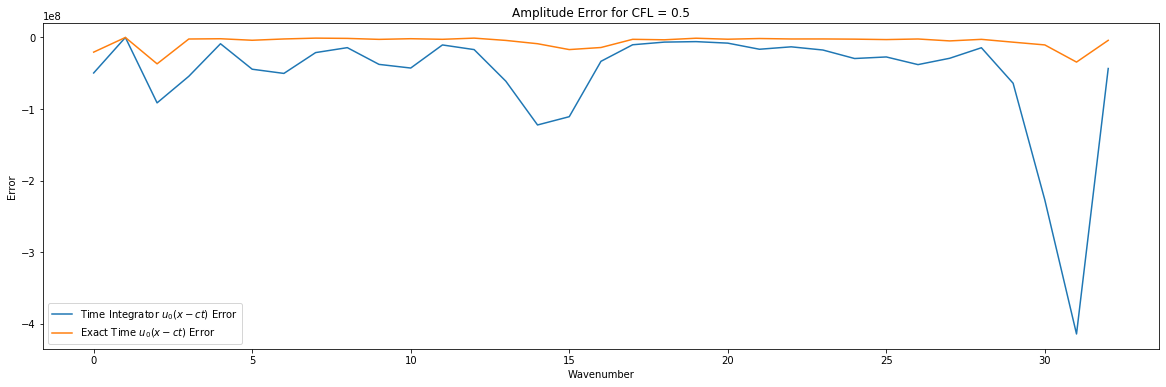

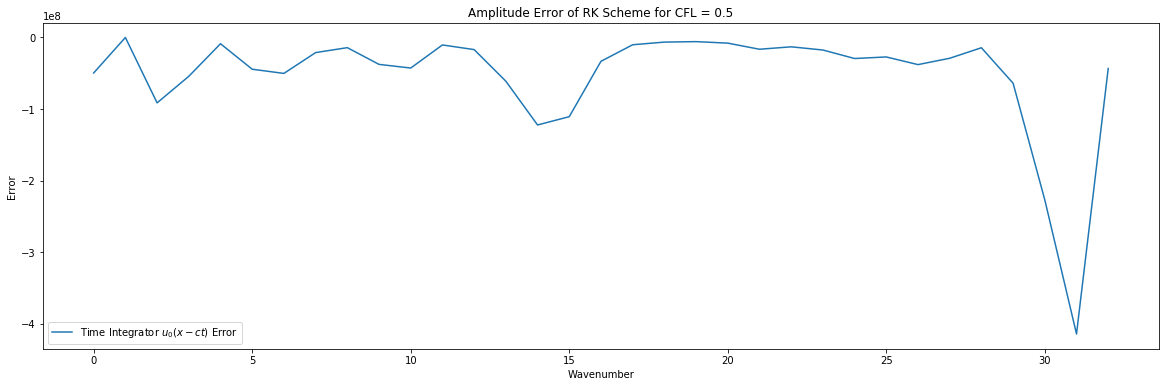

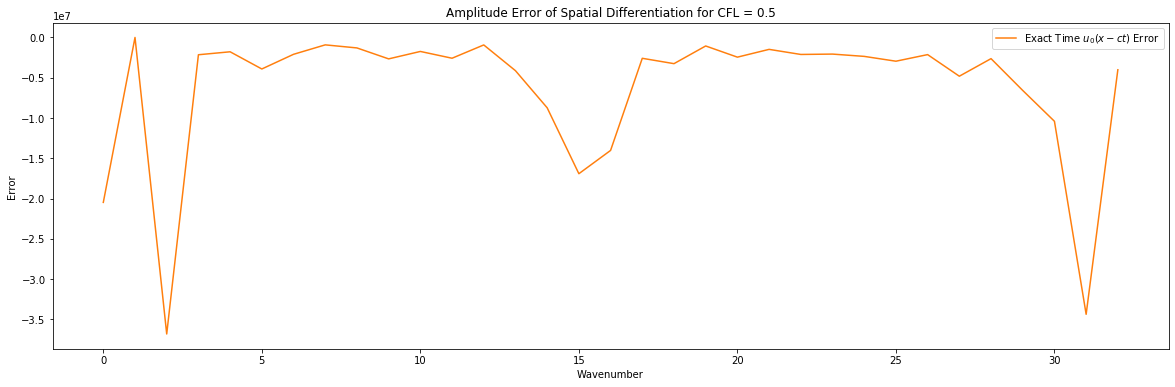

In [13]:
print(len(solverCoefs[1::2][:-1]))
print(len(solverCoefs[::2][1:]))
print(len(propFCoefs[1::2][:-1]))
print(len(propFCoefs[::2][1:]))
ampKs, solverError = TT.AmpError(omega, nullspace @ propFCoefs, nullspace @ solverCoefs)
ampKs, exTimeError = TT.AmpError(omega, nullspace @ propFCoefs, nullspace @ exTimeCoefs)
ks, error = TT.CalcError(omega, nullspace @ propFCoefs, nullspace @ solverCoefs, errorType = 'relative')
fig, ax = plt.subplots(figsize = [20, 6])
plt.plot(ampKs, solverError, label = labels[3] + ' Error', color = PT.ColorDefault(0))
plt.plot(ampKs, exTimeError, label = labels[2] + ' Error', color = PT.ColorDefault(1))
plt.title('Amplitude Error for CFL = ' + str(CFL))
plt.xlabel('Wavenumber')
plt.ylabel('Error')
plt.legend()
fig, ax = plt.subplots(figsize = [20, 6])
plt.plot(ampKs, solverError, label = labels[3] + ' Error', color = PT.ColorDefault(0))
plt.title('Amplitude Error of RK Scheme for CFL = ' + str(CFL))
plt.xlabel('Wavenumber')
plt.ylabel('Error')
plt.legend()
fig, ax = plt.subplots(figsize = [20, 6])
plt.plot(ampKs, exTimeError, label = labels[2] + ' Error', color = PT.ColorDefault(1))
plt.title('Amplitude Error of Spatial Differentiation for CFL = ' + str(CFL))
plt.xlabel('Wavenumber')
plt.ylabel('Error')
plt.legend()
plt.show()

In [14]:
print(GTT.MakeLinearInterp(8))

[[1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]


In [15]:
# Put this in new notebook.
# Given, poly coefs c_0 through c_p, fit cell-ave values
# Given phi_c, phi_j, phi_j-1, as cell averages, what's the matrix that tells you the coefs given the cell averages

A = np.arange(12).reshape(3, 4)
print(A)
print('')
print(A[:2, :])

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]

[[0 1 2 3]
 [4 5 6 7]]
